Best solution: [1 0 0 4 4 2 0 3 3 3]


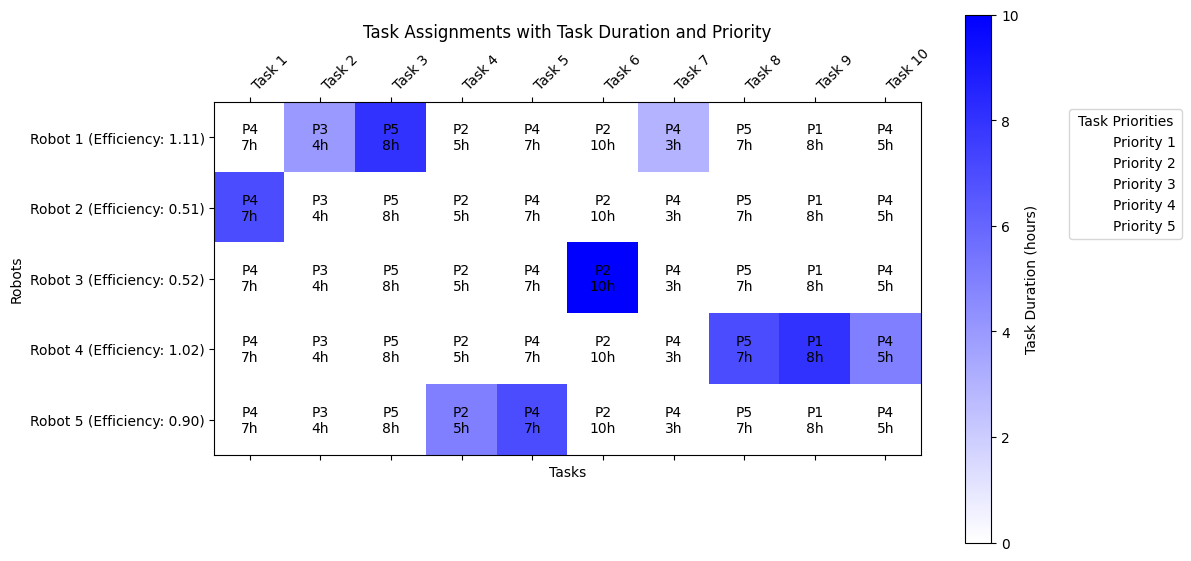

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies

# GA algorithm implementation
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, population_size=50, n_generations=100):
    def fitness_function(solution):
        # Calculate total production time
        total_times = np.zeros(len(robot_efficiencies))
        for task_idx, robot_idx in enumerate(solution):
            total_times[robot_idx] += (task_durations[task_idx]*task_priorities[task_idx]) / robot_efficiencies[robot_idx]
        total_production_time = np.max(total_times)

        # Calculate workload balance
        workload_balance = np.std(total_times)

        # Fitness function to minimize both total production time and workload balance
        fitness = total_production_time + workload_balance
        return fitness

    # Initialize population
    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_durations)) for _ in range(population_size)]

    # Evolution loop
    for _ in range(n_generations):
        # Evaluate fitness for each individual in the population
        fitness_scores = [fitness_function(individual) for individual in population]

        # Select parents for crossover using tournament selection
        parents = []
        for _ in range(population_size):
            tournament_indices = np.random.choice(range(population_size), size=5, replace=False)
            tournament_fitness = [fitness_scores[i] for i in tournament_indices]
            winner_index = tournament_indices[np.argmin(tournament_fitness)]
            parents.append(population[winner_index])

        # Perform crossover
        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = parents[i], parents[i+1]
            crossover_point = np.random.randint(1, len(task_durations))
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            offspring.extend([child1, child2])

        # Perform mutation
        mutation_rate = 0.2
        for i in range(population_size):
            mutations = int(10 * mutation_rate)
            mutate_indices = np.random.choice(range(len(task_durations)), size=mutations, replace=False)
            offspring[i][mutate_indices] = np.random.randint(0, 5, size=mutations)  # Random numbers between 0 and 4



        population = offspring

    # Select the best solution from the final population
    best_solution = min(population, key=fitness_function)
    return best_solution

# Improved visualization function
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            ax.text(j, i, f"P{task_priorities[j]}\n{task_durations[j]}h", ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)
    print("Best solution:", best_solution)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
